In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
import os
os.chdir('/Users/Lenovo/Desktop/EBAC')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('House Pricing.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Estadistica Descriptiva
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
def plot_dist_char(df, feature):
    # Figura
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    grid = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)
    
    # Media y Desviacion Estandar
    mu = np.mean(df[feature])
    sigma = np.std(df[feature])
    
    # Histograma
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:,feature], norm_hist=True, ax=ax1)
    plt.legend(['Normal dist. $\mu={:.2f}$ and $\sigma={:.2f}$'.format(mu, sigma)])
    
    # QQ Plot
    ax2 = fig.add_subplot(grid[1, :2])
    stats.probplot(df.loc[:,feature], plot=ax2)
    ax2.set_title('')

    # Box Plot
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(y=df.loc[:,feature], ax=ax3)

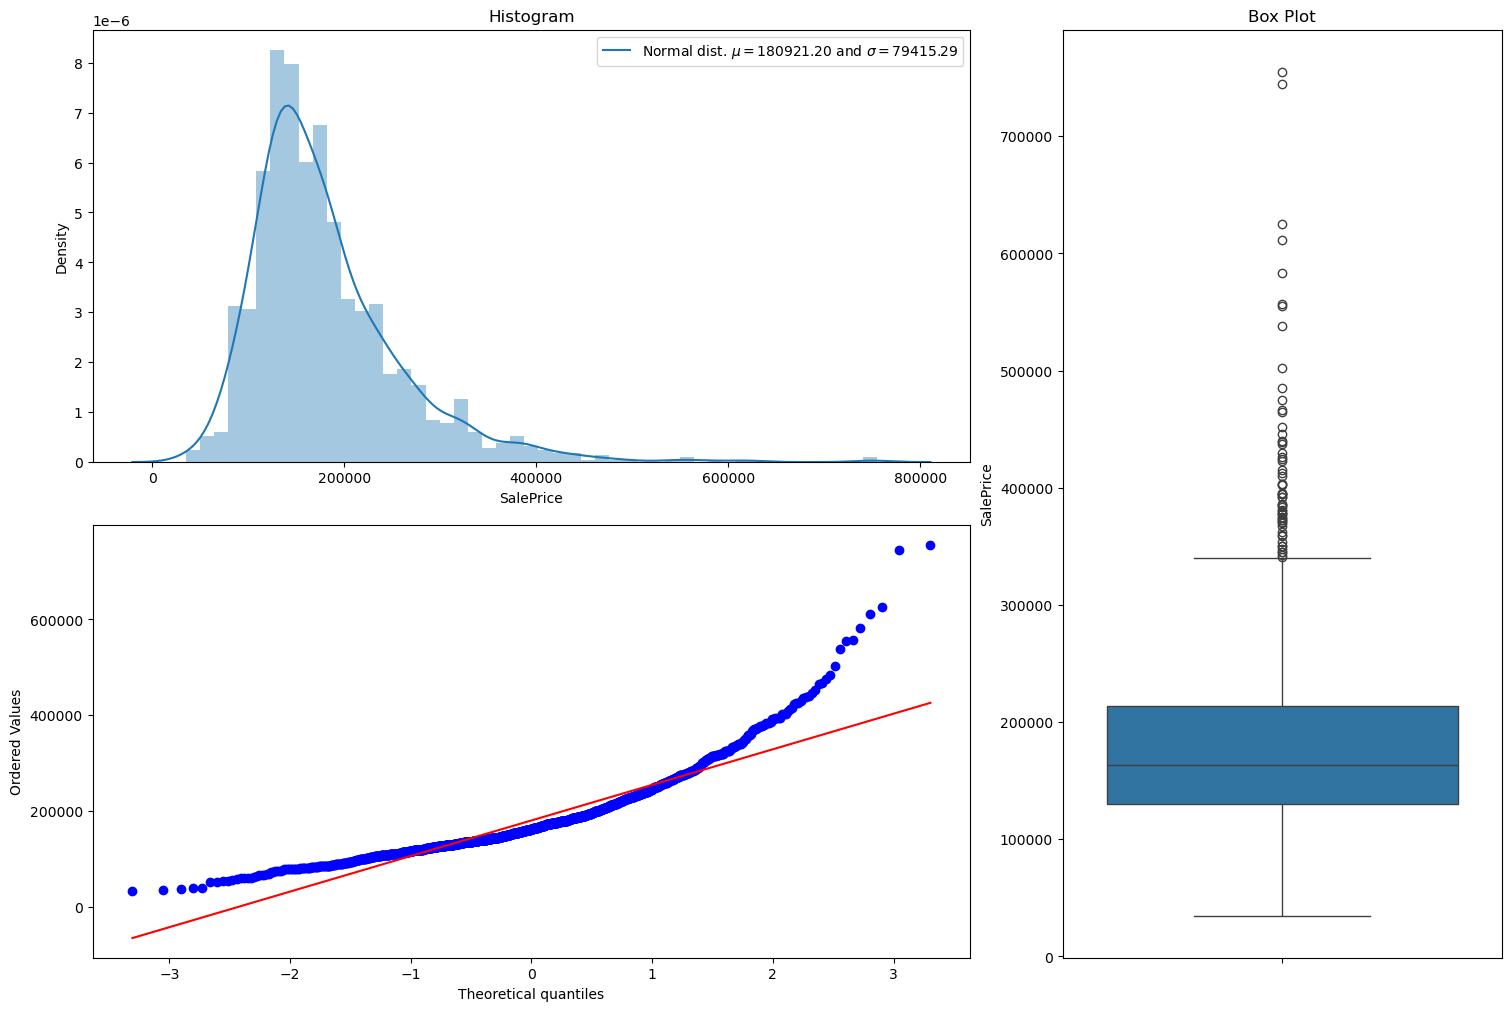

In [19]:
# Visualizacion estadistica (SalePrice)
plot_dist_char(df, 'SalePrice')

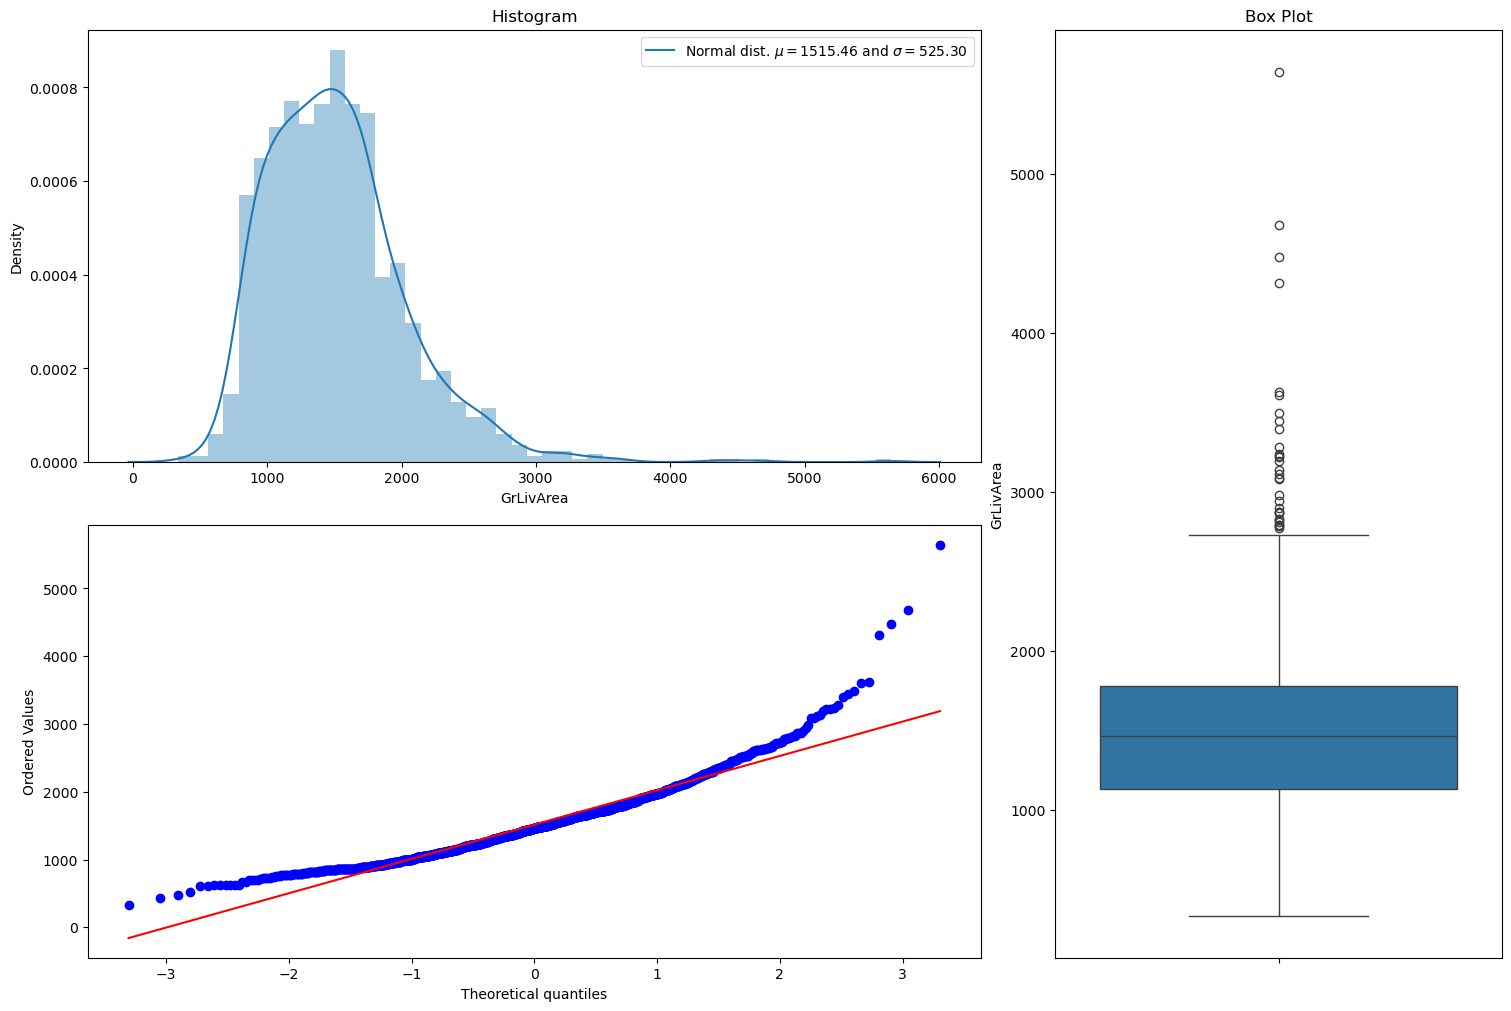

In [29]:
# Visualizacion estadistica (GrLivArea)
plot_dist_char(df, 'GrLivArea')

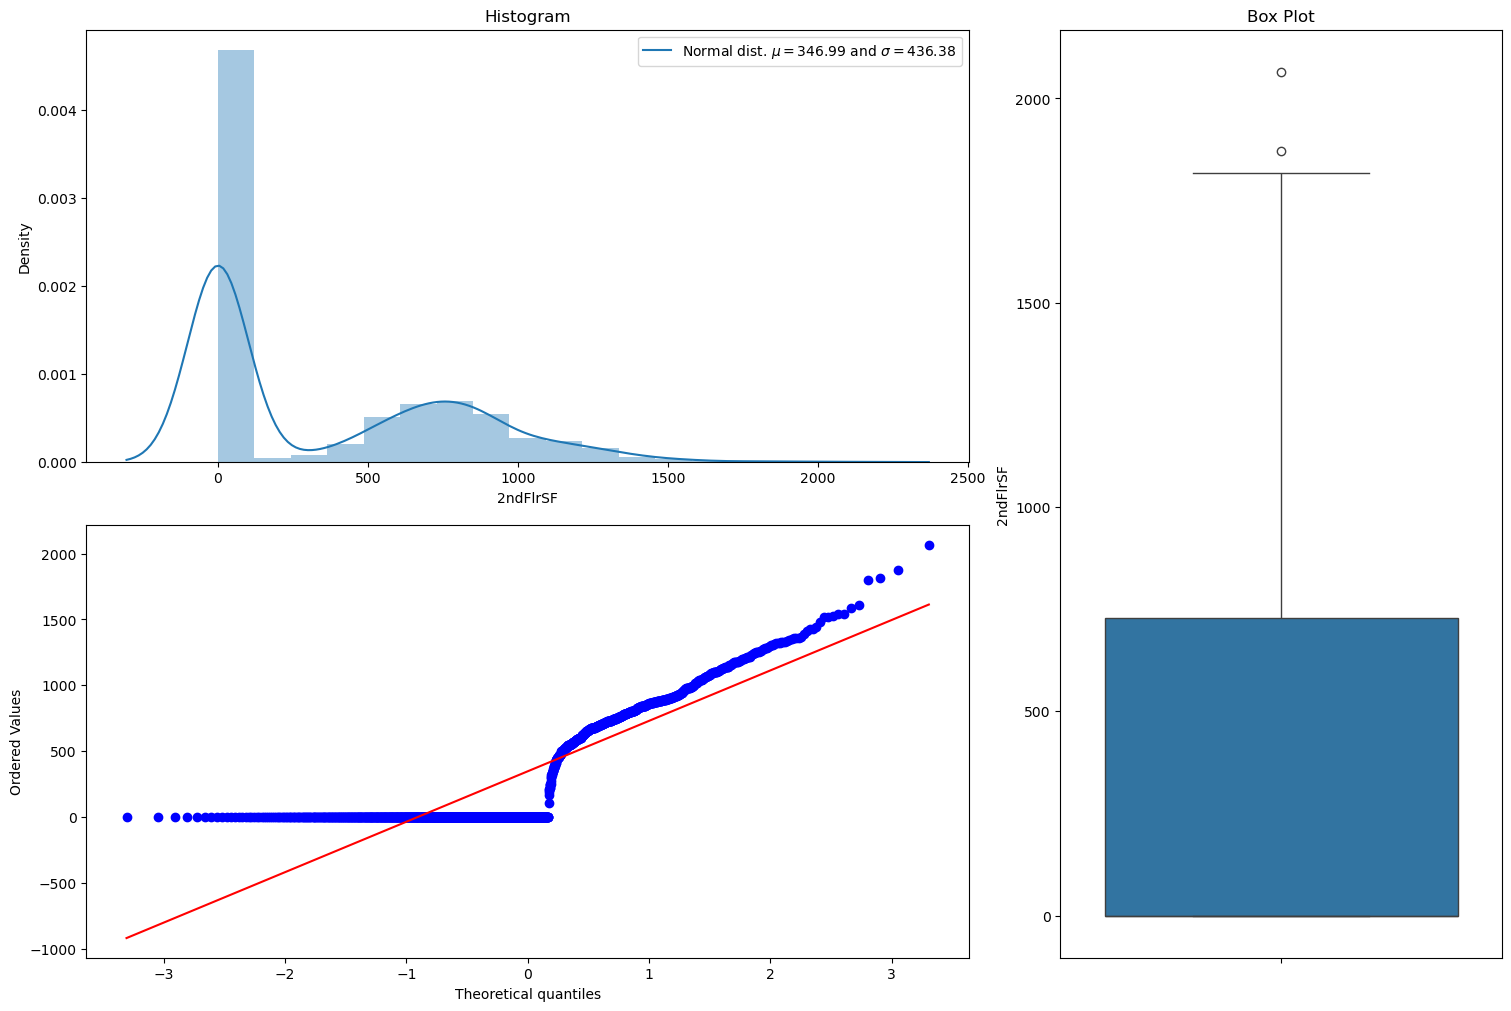

In [31]:
# Visualizacion estadistica (2ndFlrSF)
plot_dist_char(df, '2ndFlrSF')

# Conclusion
En este caso, para estas 3 variables, podemos observar que no tienen una distribucion normal.

In [33]:
# Seleccion de variables numericas
df_nuevo = df.select_dtypes(include = 'number')
df_nuevo.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


Text(0.5, 1.0, 'Heatmap of all the Features')

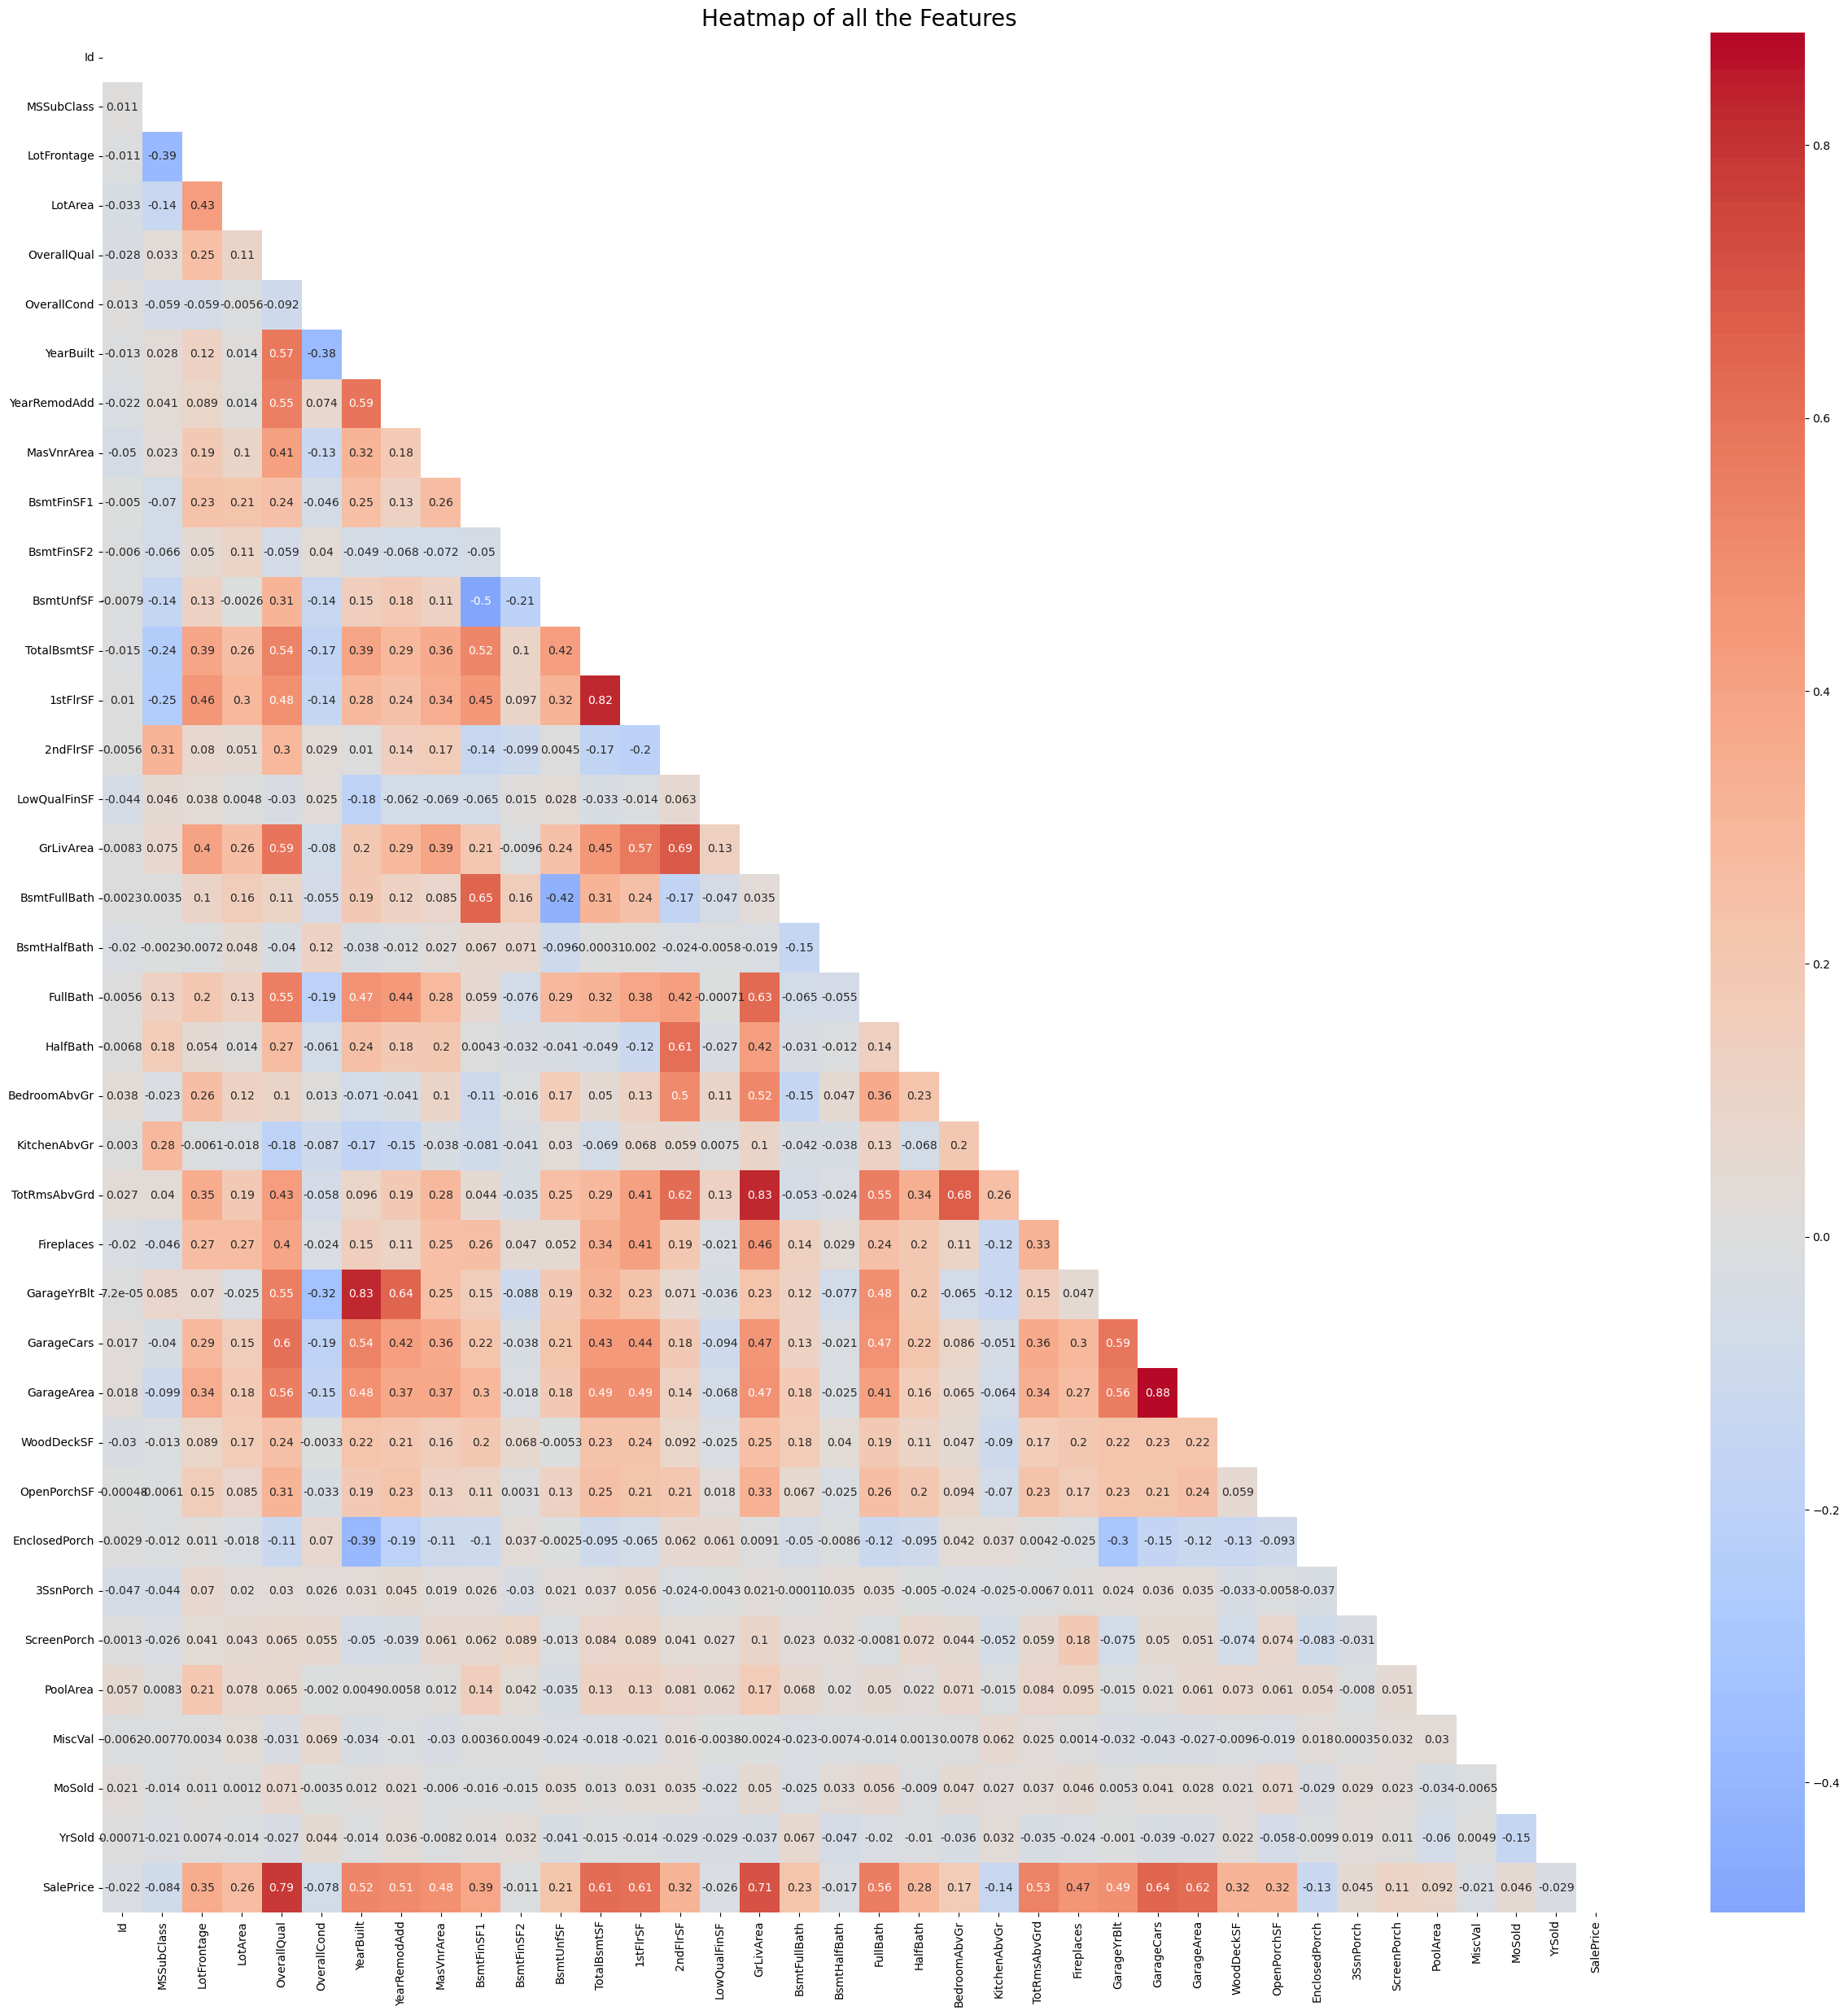

In [37]:
#Correlacion Heatmap
# Definimos un tamaño para la gráfica
f, ax = plt.subplots(figsize=(30, 30))

# Con esto quitamos los valores de la matriz de identidad (Nos ayudará a tener una mejor visualización)
mask = np.triu(np.ones_like(df_nuevo.corr(), dtype=bool))

# Grafiquemos el Heatmap
sns.heatmap(df_nuevo.corr(),
            cmap=sns.color_palette('coolwarm', 200),
            mask=mask,
            annot=True,
            center=0)

# Agrega un título a la gráfica
plt.title("Heatmap of all the Features", fontsize=20)

# Conclusion
Las variables que mas se relacionan a SalePrice son OverallQual, GrLivArea y Garagecars

In [45]:
import statsmodels.api as sm

df_nuevo = df_nuevo.dropna()
y = df_nuevo['SalePrice'] 
X = df_nuevo.drop(columns='SalePrice')

#Reporte de regresion
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()

# 5. Muestra el resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     131.8
Date:                Wed, 23 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:54:27   Log-Likelihood:                -13358.
No. Observations:                1121   AIC:                         2.679e+04
Df Residuals:                    1085   BIC:                         2.697e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.351e+05    1.7e+06     -0.197

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculamos el VIF para cada variable en X
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Creamos un DataFrame para mostrar los resultados
pd.DataFrame({'VIF': vif}, index=X.columns)

,VIF
const,2.396251e+06
Id,1.034686e+00
MSSubClass,1.718790e+00
LotFrontage,1.827885e+00
LotArea,1.356288e+00
OverallQual,3.461493e+00
OverallCond,1.765745e+00
YearBuilt,6.094850e+00
YearRemodAdd,2.747160e+00
MasVnrArea,1.464423e+00


En este caso las variables que presentan un 'VIF' infinito (BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea), asi como tambien YearBuilt.

In [52]:
# Importar las librerías necesarias
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Definir las variables: independiente (fertility) y dependiente (life)
X = df["GarageCars"].values
y = df["GarageArea"].values

# Redimensionar X para que tenga el formato correcto (n_samples, n_features)
X = X.reshape(-1, 1)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos
modelo.fit(X, y)

# Realizar predicciones sobre los datos de entrada
predicciones = modelo.predict(X)

# Calcular el error cuadrático medio (RMSE)
rmse = np.sqrt(mean_squared_error(y, predicciones))

# Calcular el coeficiente de determinación R^2
r2 = modelo.score(X, y)

# Imprimir los resultados
print("R²: {:.2f}".format(r2))
print("RMSE: {:.2f}".format(rmse))

R²: 0.78
RMSE: 100.53


# Conclusion
Para el modelo de regresion lineal, tome las variables de GarageCars y GarageArea, porque eran las que mayor correlacion tenian, al correr el modelo, la R2 fue muy positiva, teniendo 0.78 como resultado.